<p></p>

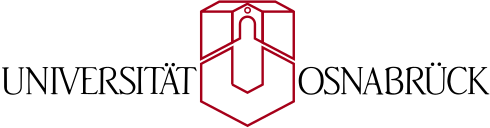
# <center>Einführung in die Künstliche Intelligenz</center> <a class="tocSkip">
### <center>Wintersemester 2020/21</center> <a class="tocSkip">
<center>Prof. Dr. Joachim Hertzberg, Felix Igelbrink, Alexander Mock</center>

# Übungsblatt 5: Logik

## Aussagenlogik

Familie Meier ist zu einer Geburtstagsfeier eingeladen. Leider können sich die Familienmitglieder (Alfons, Beate, Claus und Dorit) nicht einigen, wer hingeht und wer nicht. Nach intensiver Diskussion kann man sich jedoch auf die folgenden Grundsätze verständigen:

<ol style="list-style-type: upper-alpha;">
    <li>Alfons geht nicht zusammen mit Dorit.</li>
    <li>Wenn Beate geht, dann geht Claus mit.</li>
    <li>Wenn Alfons und Claus gehen, dann bleibt Beate zu Hause.</li>
    <li>Wenn Alfons zu Hause bleibt, dann geht Dorit oder Claus (oder beide).</li>
</ol>

Helfen Sie Familie Meier, indem Sie Ihr Wissen aus der Vorlesung anwenden.

### 
Formulieren Sie zunächst die Grundsätze in Aussagenlogik, wobei ein positives Literal bedeutet, dass das entsprechende Familienmitglied zur Feier geht.

A) Alfons => ¬Dorit
B) Beate => Claus
C) (Alfons ∧ Claus) => ¬Beate
D) ¬Alfons => (Dorit ∨ Claus)

### 
Zeigen Sie mittels Resolution in Aussagenlogik, dass es unter den oben gegebenen Grundsätzen nicht möglich ist, dass alle Familienmitglieder zur Geburtstagsfeier gehen.

Erstmal alles in KNF bringen:

Schritt 1: 
Löse <=> und => auf...aus A => B wird ¬A v B

A) ¬Alfons v ¬Dorit
B) ¬Beate v Claus
C) ¬(Alfons ∧ Claus) v ¬Beate
D) Alfons v (Dorit ∨ Claus)

Schritt 2:
Bringe alle Negationszeichen direkt vor die Variablen (deMorgansche Regeln)

A) ¬Alfons v ¬Dorit
B) ¬Beate v Claus
C) ¬Alfons v ¬Claus v ¬Beate
D) Alfons v Dorit ∨ Claus

Schritt 3:
Multipliziere aus und fasse zusammen (hier nicht mehr nötig)

Die KNF lautet also:
{{¬Alfons, ¬Dorit}, {¬Beate, Claus}, {¬Alfons, ¬Claus, ¬Beate}, {Alfons, Dorit, Claus}}

Wir wollen wissen, ob die Belegung (Alfons ∧ Beate ∧ Claus ∧ Dorit) möglich ist (in KNF dann {{Alfons}, {Beate}, {Claus}, {Dorit}})

Nun können wir mit der Resolution beginnen.

{{¬Alfons, ¬Dorit}, {¬Beate, Claus}, {¬Alfons, ¬Claus, ¬Beate}, {Alfons, Dorit, Claus}, {Alfons}, {Beate}, {Claus}, {Dorit}}

Wir resolvieren {¬Alfons, ¬Dorit} und {Alfons} über Alfons, dann folgt daraus:

{¬Dorit}

Wenn wir nun {Dorit} und {¬Dorit} über Dorit resolvieren, erhalten wir die leere Klausel {}.

Daraus folgt, dass die ursprüngliche Klauselmenge inkonsistent ist.

Das heißt, es gibt keine Belegung, sodass alle Familienmitglieder anwesend sind.

### 
Zeigen Sie nun, dass das Fernbleiben aller Familienmitglieder ebenfalls keine Lösung darstellt.

Das selbe nochmal, nur mit invertierten Klauseln unten

{{¬Alfons, ¬Dorit}, {¬Beate, Claus}, {¬Alfons, ¬Claus, ¬Beate}, {Alfons, Dorit, Claus}, {¬Alfons}, {¬Beate}, {¬Claus}, {¬Dorit}}

Wir resolvieren {¬Alfons} und {Alfons, Dorit, Claus} über Alfons und erhalten:

{Dorit, Claus}

Nun resolvieren wir {¬Dorit} und {Dorit, Claus} über Dorit, daraus folgt dann:

{Claus}

Schließlich resolvieren wir {¬Claus} mit {Claus} über Claus und erhalten die leere Klausel {}

Daraus folgt, dass die ursprüngliche Klauselmenge inkonsistent ist.

Das heißt, es gibt keine Belegung, sodass kein Familienmitglied anwesend ist.

### 
Lassen sich (1.2) und (1.3) mittels Unit- oder Inputresolution zeigen? Begründen Sie Ihre Antwort.

Unit-Resolution:

Ja, das funktioniert, weil wir in beiden Fällen ausschließlich mit Einsklauseln resolvieren.

Input-Resolution:

Ja, das funktioniert ebenfalls, da in beiden Fällen immer mindestens eine Klausel aus der Ursprungsmenge genutzt wird.

### 
Handelt es sich bei der Klauselmenge, die aus den Grundsätzen entsteht, um eine Menge von Hornklauseln? Begründen Sie Ihre Antwort.

Grundklauselmenge: 
{{¬Alfons, ¬Dorit}, {¬Beate, Claus}, {¬Alfons, ¬Claus, ¬Beate}, {Alfons, Dorit, Claus}}

Nein, es ist keine Menge von Hornklauseln, da die letzte Klausel mehr als ein positives Literal enthält.

### 
Benutzen Sie DPLL um Familie Meier eine gültige Lösung für ihr Dilemma zu präsentieren. Geben Sie jeweils an, welche DPLL-Regel Sie gerade verwenden und wie die nachfolgende Formelmenge aussieht.

{{¬Alfons, ¬Dorit}, {¬Beate, Claus}, {¬Alfons, ¬Claus, ¬Beate}, {Alfons, Dorit, Claus}}

¬Beate ist eine Pure Klausel, daher Beate = f

Jetzt haben wir:

{{¬Alfons, ¬Dorit}, {Claus}, {¬Alfons, ¬Claus}, {Alfons, Dorit, Claus}}

Claus ist eine Unit Klausel, also Claus = t

Dann bleibt uns:

{{¬Alfons, ¬Dorit}, {¬Alfons}}

¬Alfons ist wieder eine Unit Klausel, also Alfons = f

Nun haben wir:

{}

Das heißt, es ist egal, ob Dorit kommt, oder nicht.

Es bleiben also die Belegungen:

Alfons = f, Beate = f, Claus = t, Dorit = f und
Alfons = f, Beate = f, Claus = t, Dorit = t

## Modellierung in Prädikatenlogik
Repräsentieren Sie die folgenden Ausdrücke in Prädikatenlogik. Benutzen Sie einheitliche Prädikaten- und Funktionssymbole.

1. Alle Studenten, die die Vorlesung "Einführung in die Künstliche Intelligenz" hören, haben bereits die Vorlesung "Informatik A - Algorithmen & Datenstrukturen" gehört.
2. Nicht alle Studenten hören sowohl die Vorlesung "Kryptographische Verfahren" als auch die Vorlesung "Einführung in die Künstliche Intelligenz".
3. Die Studenten, die die Übungsaufgaben zur Künstlichen Intelligenz lösen, sind vorrausschauend.
4. Niemand hat Verständnis für Studenten, die ihre Übungsaufgaben nicht lösen.
5. Es gibt keinen Studenten, der die Übungsaufgaben für alle Studenten löst, die ihre Übungsaufgaben nicht selbst lösen.
6. Politiker können manche Wähler immer täuschen, manchmal alle Wähler täuschen, aber niemals immer alle Wähler täuschen.
7. Nicht alle Studenten haben die OPIUM-Regelung verstanden, aber es gibt mindestens einen, der sie allen nochmal erklärt, die sie nicht verstanden haben.

1) ∀x.[vorlesung(x, infki) ∧ vorlesung(x, infa)]

2) ∃x.[(vorlesung(x, infkv) ∧ ¬vorlesung(x, infki)) v (¬vorlesung(x, infkv) ∧ vorlesung(x, infki))]

3) ∀x.[uebung(x, infki) => vorrausschauend(x)]

4) ∀x, ∀y.[¬uebung(x) => ¬verstaendnis(y)]

5) ¬∃x, ∀y.[¬uebung(y) => uebungfuer(x, y)]

6) ∀x, ∃y.[taeuschen(x, y)] ∧ ∀x, ∀y.[manchmal(taeuschen(x, y))] ∧ 
∀x, ∃y.[¬immer(taeuschen(x, y))]

7) ∃x, ∃y.[¬verstanden(x, opium) ∧ verstanden(y, opium) ∧ erklaeren(x, y, opium)]

## Modellierung in Prolog

Im Folgenden werden Sie eine existierende Wissensbasis nutzen, um darauf mittels Prolog neue Fakten zu implementieren. Um die Verwendung von Prolog etwas komfortabler zu gestalten, haben wir eine verbesserte Version der `Prolog`-Klasse aus dem `pyswip`-Paket bereitgestellt. Diese `IsolatedProlog`-Klasse implementiert mit einer Außnahme (siehe unten) die selbe Schnittstelle wie das Original, allerdings sind die einzelnen Instanzen voneinander isoliert. Dadurch können Sie während der Entwicklung ein neues leeres Prolog-Objekt erzeugen, ohne den Kernel neu starten zu müssen.

Zusätzlich ist das Laden (`consult`) von bestehenden Wissensbasen ohne einen Umweg über eine Datei möglich. Dazu verfügt die Methode `consult` über einen zusätzlichen Parameter `file`.

Gegeben Sei folgende Wissensbasis des Stammbaums der griechischen Götter:


In [2]:
from isolated_prolog import IsolatedProlog # use the improved version of the Prolog object

prolog_code = """
/* WISSENSBASIS der Griechische Goetter und Giganten */ 

/* FAKTEN */ 
weiblich(asteria).
weiblich(demeter).
weiblich(gaia).
weiblich(artemis). 
weiblich(athene). 
weiblich(eleithyia). 
weiblich(hebe).
weiblich(hera).
weiblich(leto). 
weiblich(hecate). 
weiblich(hestia).
weiblich(metis).
weiblich(mnemosyne). 
weiblich(persephone).
weiblich(phoibe).
weiblich(rhea). 
weiblich(selene). 
weiblich(themis).
weiblich(tethys).
weiblich(theia). 

maennlich(apollon). 
maennlich(ares). 
maennlich(chaos).
maennlich(chronos).
maennlich(eos). 
maennlich(hades). 
maennlich(helios). 
maennlich(hyperion).
maennlich(koios).
maennlich(iapetos).
maennlich(okeanos).
maennlich(perses). 
maennlich(poseidon).
maennlich(uranos).
maennlich(zeus). 

/*  Liste der Elternteile (Mutter oder Vater) und ihrer Kinder: elternteil(Elternteil,Kind) */ 
elternteil(chaos,gaia). 
elternteil(chronos,poseidon). 
elternteil(hyperion,eos). 
elternteil(hyperion,helios). 
elternteil(hyperion,selene). 
elternteil(koios,asteria). 
elternteil(koios,leto). 
elternteil(chronos,demeter). 
elternteil(chronos,hades). 
elternteil(chronos,hera). 
elternteil(chronos,hestia). 
elternteil(chronos,zeus). 
elternteil(okeanos,fluesse). 
elternteil(okeanos,metis). 
elternteil(okeanos,okeaniden). 
elternteil(perses,hekate). 
elternteil(uranos,hecatoncheiren). 
elternteil(uranos,hyperion). 
elternteil(uranos,iapetos). 
elternteil(uranos,koios). 
elternteil(uranos,krios). 
elternteil(uranos,chronos). 
elternteil(uranos,kyklopen). 
elternteil(uranos,mnemosyne). 
elternteil(uranos,okeanos). 
elternteil(uranos,phoibe). 
elternteil(uranos,rhea). 
elternteil(uranos,tethys). 
elternteil(uranos,theia). 
elternteil(uranos,themis). 
elternteil(zeus,apollon). 
elternteil(zeus,ares). 
elternteil(zeus,artemis). 
elternteil(zeus,athene). 
elternteil(zeus,eleithyia). 
elternteil(zeus,hebe). 
elternteil(zeus,musen). 
elternteil(zeus,persephone). 
elternteil(asteria,hecate). 
elternteil(demeter,persephone). 
elternteil(gaia,hecatoncheiren). 
elternteil(gaia,hyperion). 
elternteil(gaia,iapetos). 
elternteil(gaia,koios). 
elternteil(gaia,krios). 
elternteil(gaia,chronos). 
elternteil(gaia,kyklopen). 
elternteil(gaia,mnemosyne). 
elternteil(gaia,okeanos). 
elternteil(gaia,phoibe). 
elternteil(gaia,rhea). 
elternteil(gaia,tethys). 
elternteil(gaia,theia). 
elternteil(gaia,themis). 
elternteil(gaia,uranos).  
elternteil(hera,ares). 
elternteil(hera,eleithyia). 
elternteil(hera,hebe). 
elternteil(hera,hephaistos). 
elternteil(leto,apollon). 
elternteil(leto,artemis). 
elternteil(metis,athene). 
elternteil(mnemosyne,musen). 
elternteil(phoibe,asteria). 
elternteil(phoibe,leto). 
elternteil(rhea,demeter). 
elternteil(rhea,hades). 
elternteil(rhea,hera). 
elternteil(rhea,hestia). 
elternteil(rhea,poseidon). 
elternteil(rhea,zeus). 
elternteil(tethys,fluesse). 
elternteil(tethys,metis). 
elternteil(tethys,okeaniden). 
elternteil(theia,eos). 
elternteil(theia,helios). 
elternteil(theia,selene). 


vater_von(VATER, KIND):- elternteil(VATER, KIND), maennlich(VATER).

mutter_von(MUTTER, KIND):- elternteil(MUTTER, KIND), weiblich(MUTTER).

eltern_von(VATER, MUTTER, KIND):- vater_von(VATER, KIND), mutter_von(MUTTER, KIND).

sohn_von(ELTERNTEIL, SOHN):- elternteil(ELTERNTEIL, SOHN), maennlich(SOHN).

tochter_von(ELTERNTEIL, TOCHTER):- elternteil(ELTERNTEIL, TOCHTER), weiblich(TOCHTER).



kind_von(ELTERNTEIL, KIND):- sohn_von(ELTERNTEIL, KIND); tochter_von(ELTERNTEIL, KIND).

geschwister(EINS, ZWEI):- kind_von(ELTERNTEIL, EINS), kind_von(ELTERNTEIL, ZWEI).

bruder_von(BRUDER, ZWEI):- geschwister(BRUDER, ZWEI), maennlich(BRUDER).

schwester_von(SCHWESTER, ZWEI):- geschwister(SCHWESTER, ZWEI), weiblich(SCHWESTER).

"""

# keine Lust mehr... :D

prolog = IsolatedProlog()
prolog.consult(prolog_code, file=False) # Load the prolog facts directly from the string instead of the file

### 
Programmieren Sie in Prolog die folgenden Prädikate und testen Sie sie diese mit der Wissensbasis.
- `vater_von/2`
- `mutter_von/2`
- `eltern_von/3`
- `sohn_von/2`
- `tochter_von/2`

In [3]:
x = prolog.query("sohn_von(X, poseidon).")

print(list(x))

[{'X': 'chronos'}, {'X': 'rhea'}]


### 
Programmieren Sie in Prolog die folgenden Prädikate und testen Sie sie diese mit der Wissensbasis.
- `geschwister/2`
- `bruder_von/2`
- `schwester_von/2`
- `onkel_von/2`
- `tante_von/2`

In [ ]:
#TODO: INSERT YOUR CODE HERE


### 
Programmieren Sie in Prolog die folgenden Prädikate und testen Sie sie diese mit der Wissensbasis.
- `grossvater_von/2`
- `enkel_von/2`
- `vorfahr/2`
- `nachfahr/2`

In [ ]:
#TODO: INSERT YOUR CODE HERE


## Hornklauseln
Gegeben ist Ihnen die folgende aussagenlogische Formelmenge:
\begin{align*}
  \neg  &A \\
  \neg A  \Rightarrow  &B \\
  B       \Rightarrow  &C \\
  \neg  &C
\end{align*}
Begründen Sie jeweils Ihre Antworten.

### 
Handelt es sich hierbei um eine Menge von *Hornklauseln*?

Noch einmal in KNF:

{{¬A}, {A, B}, {¬B, C}, {¬C}}

Nein, da die zweite Klausel mehr als ein positives Literal enthält.

### 
Gibt es definite Klauseln in dieser Menge?

In [ ]:
Ja, Klausel 3 ist eine definite Klausel, da sie genau ein positives Literal enthält.

### 
Lässt sich die Konsistenz bzw. Inkonsistenz der Wissensbasis mittels Input-Resolution zeigen?
Falls dies möglich sein sollte, so geben Sie die einzelnen Resolutionsschritte an.
Ist es nicht möglich Konsistenz bzw. Inkonsistenz mittels Input-Resolution zu zeigen, so legen Sie dar, warum  dies nicht möglich ist.

In [ ]:
Ja, es ist möglich, wenn man von vorne nach hinten resolviert.

Also erst {¬A} und {A, B} über A, dann erhält man {B}

Dann {B} und {¬B, C} über B, dann erhält man {C}

Und durch {C} und {¬C} über C erhält man die leere Klausel {}

Hier war in jedem Schritt eine Klausel aus der Ursprungsmenge enthalten.

## Mensaessen

Gegeben sind Ihnen folgende Aussagen:

<ol style="list-style-type: upper-alpha;">
    <li>Jeden Freitag gibt es in der Mensa Fisch.</li>
    <li>Wenn es Wildgerichte gibt, gibt es Knödel.</li>
    <li>Es gibt nicht jeden Tag eine Tagessuppe.</li>
    <li>Für alle Studenten, die das Tagesessen nicht mögen, gibt es immer Pommes und/oder Salat.</li>
    <li>Es gibt Studenten, die nicht in die Mensa gehen.</li>
    <li>Wenn es Wurst gibt, isst Stefan Wurst.</li>
    <li>Stefan ist Student.</li>
</ol>

### 
Formen Sie die Aussagen in Prädikatenlogik um.

YOUR ANSWER HERE

### 
Bilden Sie die KNF der prädikatenlogischen Formeln.

YOUR ANSWER HERE

### 
Modellieren Sie die Aussagen in Prolog. Fügen Sie in Ihre Prolog-Wissensbasis ebenfalls Fakten hinzu, welche die Wochentage repräsentieren (z.B. `freitag`) und einige Studenteninstanzen mit denen die Aussagen erfüllt sind.

YOUR ANSWER HERE